<a href="https://colab.research.google.com/github/andrea0026/proyecto2/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data_science/Machine learning/archivos/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Primera opción: conjunto de datos 1

1) Fuente de datos: https://www.kaggle.com/datasets/adityakadiwal/water-potability

2) Breve descripción de datos: Este data set muestra 9 caracteristicas sobre la calidad del agua, a partir de estas se determina si el agua es potable o no.


Diccionario de los datos:
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

## Proyecto 2 - Parte 2 (base) 

Para cumplir con los requisitos para esta semana, deben haber:

-eliminado las columnas innecesarias

-eliminado las filas duplicadas

-identificado y abordado los valores faltantes 

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

-producido visuales univariantes para el objetivo y todas las características

-identificado los valores atípicos

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

In [6]:
#validación de columnas o características
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
#validar si existen columnas duplicadas
df.duplicated().any()

False

In [9]:
#Identificar y abordar los valores faltantes
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df.shape

(3276, 10)

In [12]:
# Dada la información anterior, decido aplicar la estrategia de imputación, para abordar los datos faltantes con el promedio.
# Crear Pipeline:

num_selector = make_column_selector(dtype_include='number')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(mean_imputer, scaler)

In [14]:
#Identificar valores atípicos

df.describe().round(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.00,3276.00,3276.00,3276.00,2495.00,3276.00,3276.00,3114.00,3276.00,3276.00
mean,7.08,196.37,22014.09,7.12,333.78,426.21,14.28,66.40,3.97,0.39
std,1.59,32.88,8768.57,1.58,41.42,80.82,3.31,16.18,0.78,0.49
min,0.00,47.43,320.94,0.35,129.00,181.48,2.20,0.74,1.45,0.00
25%,6.09,176.85,15666.69,6.13,307.70,365.73,12.07,55.84,3.44,0.00
50%,7.04,196.97,20927.83,7.13,333.07,421.88,14.22,66.62,3.96,0.00
75%,8.06,216.67,27332.76,8.11,359.95,481.79,16.56,77.34,4.50,1.00
max,14.00,323.12,61227.20,13.13,481.03,753.34,28.30,124.00,6.74,1.00


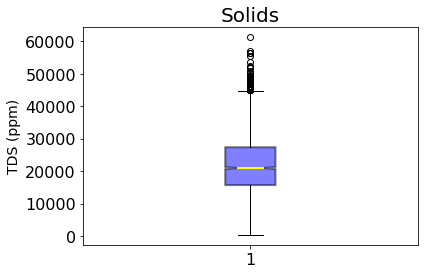

In [21]:
#Parece que la colunma Solids tiene valores atípicos es asi que valido con una gráfica de boxplot.

tds = df['Solids']
plt.boxplot([tds],
                        notch=True,
                        patch_artist=True,
                        widths=.15,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('TDS (ppm)', fontsize = 14);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.title('Solids', fontdict={'fontsize': 20});

Segun el gráfico anterior se presenta un número importante de valores atípicos a partir de 45.000

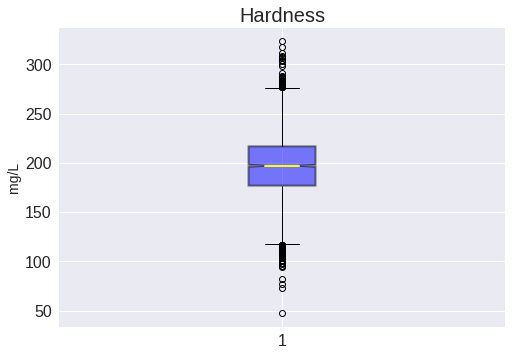

In [30]:
# Ahora veamos el comportamiento de los datos de la colunma Hardness tambien con un gráfico Boxplot.
tds = df['Hardness']
plt.boxplot([tds],
                        notch=True,
                        patch_artist=True,
                        widths=.15,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('mg/L', fontsize = 14);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.title('Hardness', fontdict={'fontsize': 20});

Hardness presenta valores atipicos por debajo de 120 mg/L y por encima de 280 mg/L, sin embargo en el gráfico de histograma siguiente vemos que los datos se comportan como una distribución normal.

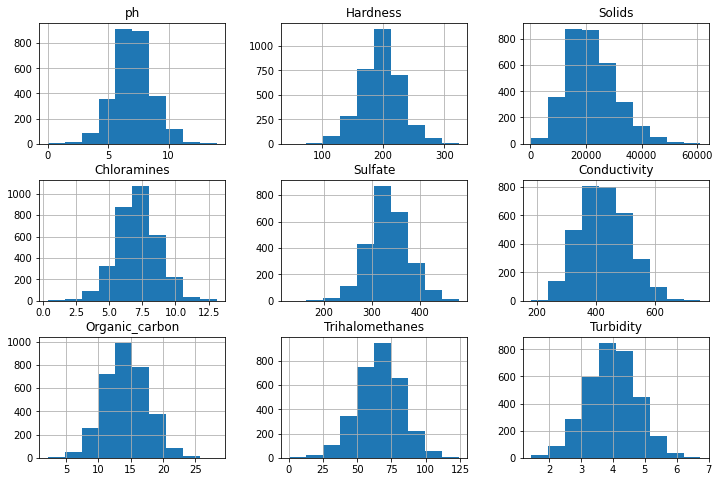

In [23]:
#Gráfico univariante de todas las caracteristicas, cada histograma muestra el comportamiento de los datos 
df.drop('Potability', axis=1).hist(figsize=(12,8));

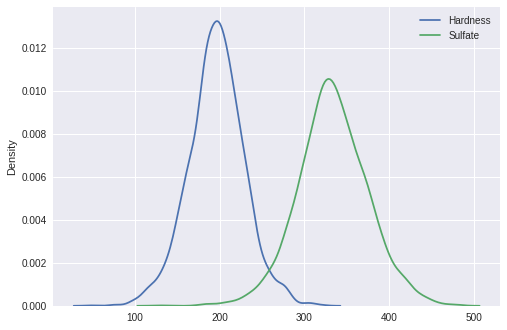

In [31]:
# Dos curvas de distribución para Hardness y Sulfates que representan igual unidad de medida mg/L
plt.style.use('seaborn')
sns.kdeplot(df['Hardness']);
sns.kdeplot(df['Sulfate']);
plt.xlabel('')
plt.legend(labels=['Hardness','Sulfate']);

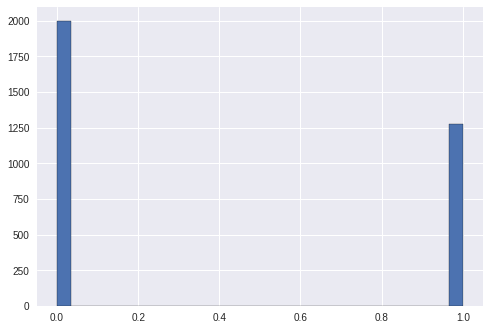

In [24]:
# Ahora veamos el comportamiento de los datos para la columna objetivo, Potability.
plt.style.use('seaborn')
df['Potability'].hist(bins=30, edgecolor='black');

In [29]:
#Casi el 61% porciento de los datos  pertenece a agua no potable, y el 39% restante a agua que si es potable.
df['Potability'].value_counts(normalize = True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

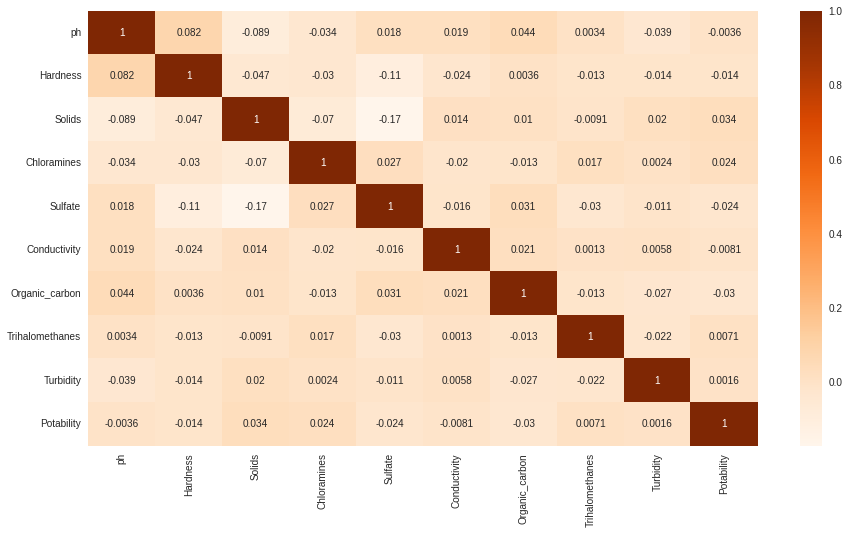

In [32]:
#producir un mapa de calor de correlación e identificar cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

plt.figure(figsize = (15,8))
correlations = df.corr();
sns.heatmap(correlations, cmap='Oranges' , annot=True);

El mapa de calor muestra que no existe ninguna correlación entre las caracteristicas ya que cada coeficiente es cercano a cero.